In [ ]:
import pandas as pd


caminho_locals_data= 'locals.json'

locals_data = pd.read_json(caminho_locals_data, encoding="utf-8" )

locals_data.head()

In [ ]:
#Listar os possiveis rooms registrados no locals.json

import json

with open('locals.json', 'r', encoding='utf-8') as file:
    locals_data = json.load(file)

rooms_name = []

for local in locals_data:
    if 'rooms' in local:
        for sala in local['rooms']:
            nome_sala = sala['name']
            if nome_sala not in rooms_name:
                rooms_name.append(nome_sala)

print("Nomes das salas registrados:")
print("Numero de Rooms: ", len(rooms_name))
for nome_sala in rooms_name:
    print(nome_sala)


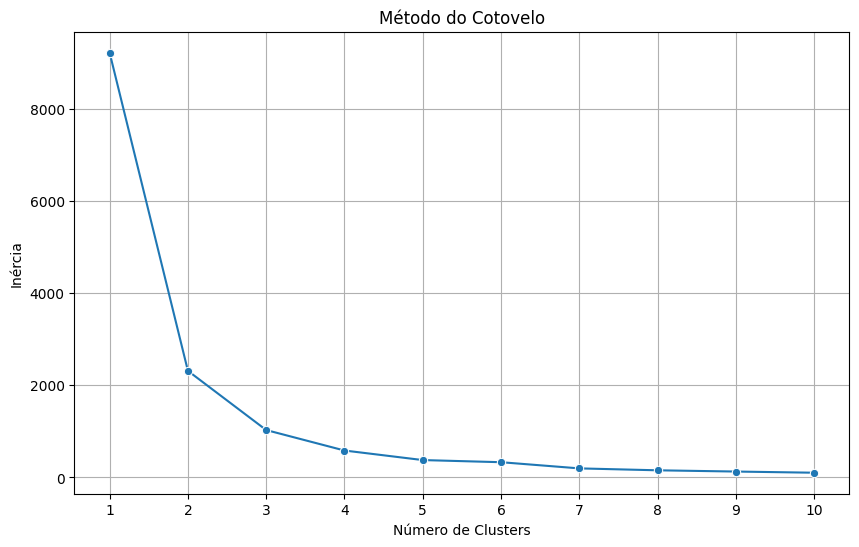

In [59]:
#Determinar o numero de cluster 

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

rooms_encoded = label_encoder.fit_transform(rooms_name)
dados_numpy = np.array(rooms_encoded).reshape(-1, 1)


rooms_dictionary = dict(zip(rooms_encoded, rooms_name))


# print(rooms_encoded)
# print(rooms_dictionary)

kmeans = KMeans()

inercias = []
for k in range(1, 11):
    kmeans.set_params(n_clusters=k)
    kmeans.fit(dados_numpy, rooms_dictionary)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inercias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [62]:
#Agrupando os Rooms para achar semelhanca


from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
import numpy as np

print(rooms_name)



vetorizador = TfidfVectorizer()
X = vetorizador.fit_transform(rooms_name)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

clusters = {}
for i in range(len(rooms_name)):
    if kmeans.labels_[i] not in clusters:
        clusters[kmeans.labels_[i]] = [rooms_name[i]]
    else:
        clusters[kmeans.labels_[i]].append(rooms_name[i])

print("Clusters formados:")
for cluster, salas in clusters.items():
    print(f"Cluster {cluster + 1}: {salas}")
    


['Sala de estar', 'Cozinha', 'Banheiro', 'Sacada', 'Lavanderia', 'Garagem', 'Suite casal', 'Banheiro suite', 'Sala estar', 'Sala', 'Homologação', 'Jardim ', 'Academia', 'Área serviço', 'Escritório ', 'Piscina', 'Sala festa', 'Suite baby', 'Suite visita', 'Suite Vítor', 'Suite Ivo/Caren', 'Área de festa', 'Quarto de visitas', 'Quarto da Laura', 'Copa', 'Suite', 'Schlafzimmer', 'Nelson', 'Teste', 'Quarto', 'Dispensa', 'Varanda', 'Corredor', 'Área Gourmet ', 'Banheiro Corredor', 'Banheiro Suíte ', 'Suíte ', 'Quarto frente', 'Quarto dos fundos', 'Quarto filha', 'Sala de jogos', 'Quarto de visita ', 'Sacada ', 'Quarto crianças ', 'Quarto casal', 'Engenharia', 'Escritório', 'Sala de reunião ']
Clusters formados:
{3: ['Sala de estar', 'Cozinha', 'Sacada', 'Lavanderia', 'Garagem', 'Sala estar', 'Sala', 'Homologação', 'Jardim ', 'Academia', 'Área serviço', 'Escritório ', 'Piscina', 'Sala festa', 'Área de festa', 'Copa', 'Schlafzimmer', 'Nelson', 'Teste', 'Dispensa', 'Varanda', 'Corredor', 'Área

In [ ]:
import json

# Carregar o arquivo locals.json
with open('locals.json', 'r' , encoding='utf-8') as file:
    locals_data = json.load(file)

# Lista para armazenar as informações encontradas
cluster_info = []
cluster_list= ['Uso geral','Banheiros','Suites','Quartos']
cluster_dictionary = dict(zip(cluster_list, clusters.values()))



for cluster,salas in cluster_dictionary.items():
    info = []
    for sala in salas:
        for entry in locals_data:
            i=0
            for rooms in entry['rooms']:
                if rooms['name'] == sala:
                    info.append(entry)
    cluster_info.append(info)

print("Numero de entrada : " , len(cluster_info))

for quartos in cluster_info[0]:
    print(quartos)
       



# print(cluster_info[0][0]['name'])


In [243]:
#Criando um dataframe para cada cluster

import json

with open('locals.json', 'r' , encoding='utf-8') as file:
    locals_data = json.load(file)

from sklearn.cluster import KMeans

#cria o dataframe com os dados
cluster_list= ['Uso geral','Banheiros','Suites','Quartos']

df_Uso_geral = pd.DataFrame(cluster_info[0])
df_Banheiros = pd.DataFrame(cluster_info[1])
df_Suites = pd.DataFrame(cluster_info[2])
df_Quartos = pd.DataFrame(cluster_info[3])

# pd.options.display.float_format = '{:.2f}'.format


df_Uso_geral.head(10)

df_Uso_geral['rooms'].value_counts()
# df_Suites['rooms'].value_counts()



rooms
[{'name': 'Jardim ', 'order': 13, '_id': {'$oid': '65da319004f5f1b7fe9883e8'}, 'cards': [{'_id': {'$oid': '65da3323fd2bf2dcc1a72bea'}, 'device': {'$oid': '65da2a0904f5f1b7fe96e839'}, 'endpoint': '', 'isActive': True, 'name': 'Jardim', 'order': 0, 'type': 'switch-bulb', 'integrationsExternalId': 'e1c22bdf-398e-4421-ab6f-60080d63e1b6'}]}, {'name': 'Academia', 'order': 0, '_id': {'$oid': '6563a7f116535203d8b01272'}, 'cards': [{'_id': {'$oid': '6563a82116535203d8b01601'}, 'name': 'Cortina', 'type': 'curtain', 'order': 0, 'device': {'$oid': '6563a80b16535203d8b01452'}, 'endpoint': '', 'isActive': True, 'integrationsExternalId': '7faa41ab-469c-4f30-bc77-1527bfffe9d3'}, {'_id': {'$oid': '6563abd5b1dbe725b30f8a2f'}, 'name': 'Lampada1', 'type': 'switch-bulb', 'order': 0, 'device': {'$oid': '652d1f496058063f7aa23e19'}, 'endpoint': 'left', 'isActive': True, 'integrationsExternalId': 'bdb055f4-0568-41fd-835e-8c5c10104612'}, {'_id': {'$oid': '6563abd5b1dbe725b30f8a31'}, 'name': 'Lâmpada 2', '